In [1]:
# tf 2.2

import tensorflow as tf
print(tf.__version__)

2.2.0


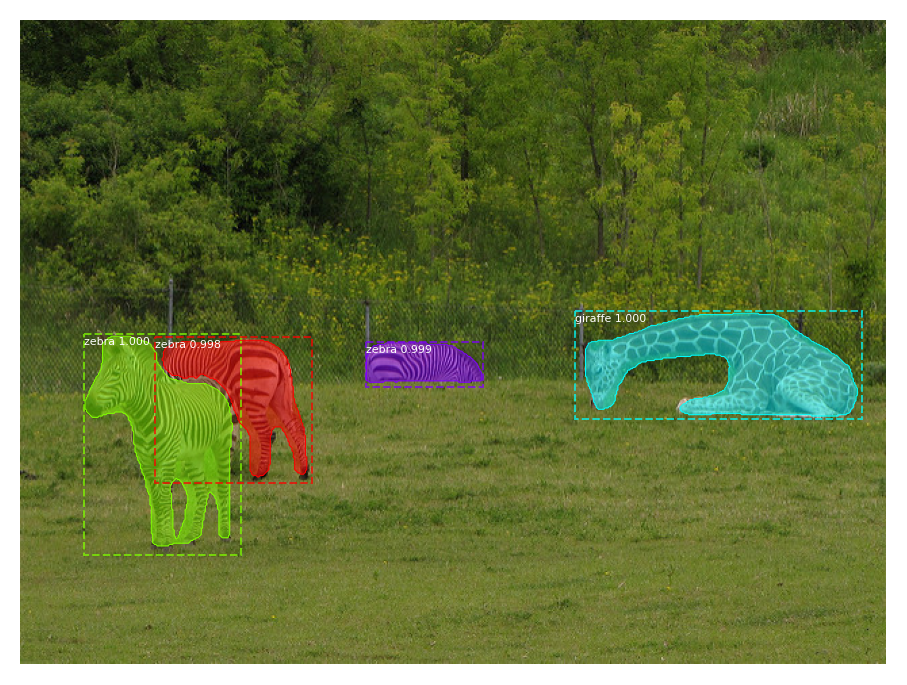

In [5]:
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os

CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 
               'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 
               'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 
               'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 
               'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 
               'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 
               'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
               'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
               'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

class SimpleConfig(mrcnn.config.Config):
    NAME = "coco_inference"
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2
    
    # 기본(예) coco 데이터셋에는 80개의 클래스가 있고 +1 의 배경 클래스 
    # 그래서 81(default)
    NUM_CLASSES = len(CLASS_NAMES)

model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())
# model.keras_model.summary()

model.load_weights(filepath="mask_rcnn_coco.h5", 
                   by_name=True)

image = cv2.imread("images/3627527276_6fe8cd9bfe_z.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r = model.detect([image], verbose=0)
# print(r.keys())

# 모델에 제공된 첫 번째 이미지에 대한 정보를 반환하기 위해 인덱스 0
r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])